In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df =  pd.read_csv("Salaries.csv")

In [66]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [6]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# EDA

## Scatterplot

<AxesSubplot:xlabel='rank', ylabel='salary'>

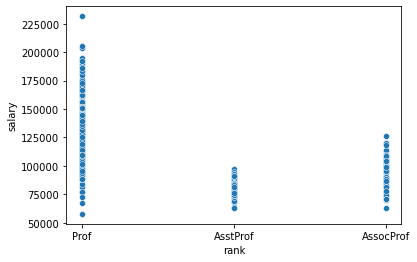

In [9]:
sns.scatterplot(x='rank',y='salary',data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

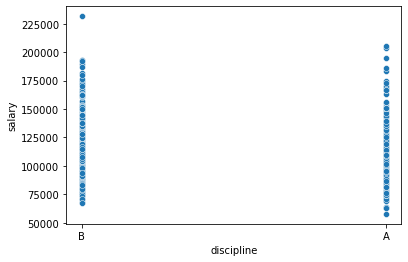

In [11]:
sns.scatterplot(x='discipline',y='salary',data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

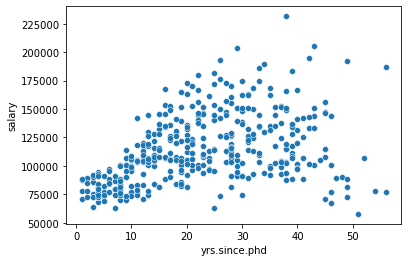

In [12]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

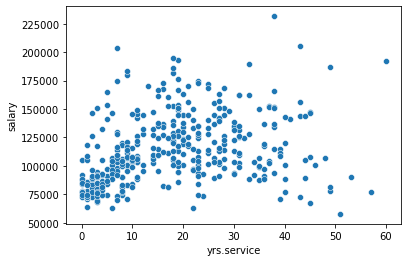

In [13]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

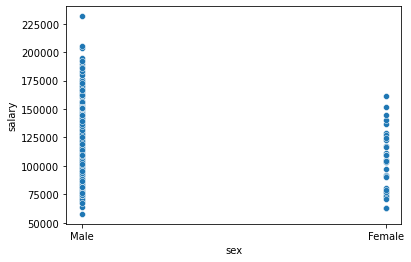

In [14]:
sns.scatterplot(x='sex',y='salary',data=df)

In [15]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:>

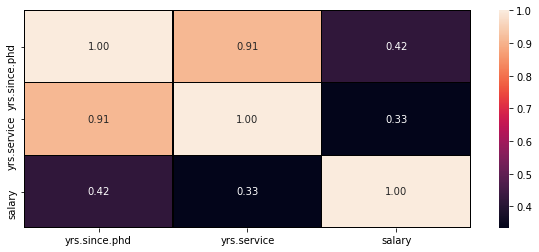

In [21]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor="black", fmt='.02f')

# Describing DataSets

In [22]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


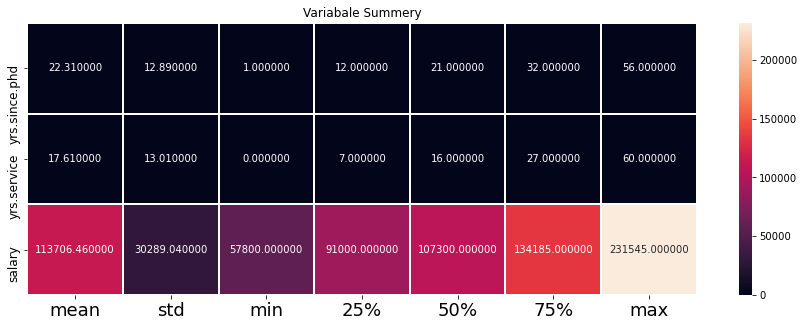

In [31]:
plt.figure(figsize=(15,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variabale Summery")
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# Outliers Checking

['yrs.since.phd' 'yrs.service' 'salary']


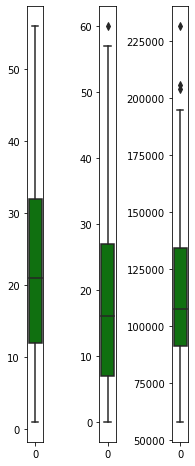

In [64]:
collist=df.describe().columns.values
print(collist)
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)    
    sns.boxplot(data=df[collist[i]],color='green')
    plt.tight_layout()

yrs.service and salary have more outliers

# Skewness:

In [57]:
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

# Normal Ditribution Curve

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

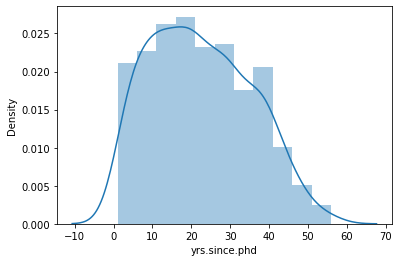

In [61]:
sns.distplot(df["yrs.since.phd"])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

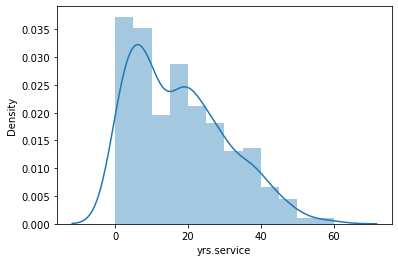

In [62]:
sns.distplot(df["yrs.service"])

<AxesSubplot:xlabel='salary', ylabel='Density'>

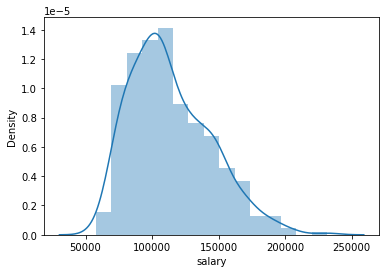

In [63]:
sns.distplot(df["salary"])

In [68]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df[collist]))
z.shape

(397, 3)

In [69]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([2, 1, 1, 2], dtype=int64))


In [70]:
df_new=df[(z>3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(397, 6)
(0, 6)


In [71]:
loss_percent=(397-0)/397*100
print(loss_percent)

100.0
